## Sales Dataset Cleaning 

In [36]:
# import libriaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [38]:
# import dataset 
df = pd.read_csv("sales_dataset.csv")

# confirm Import
df

,Order Date,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin
0,01/01/2021 00:00,East,Small Business,Electronics,9,153.73,1383.57,0.07
1,01/01/2021 01:00,West,Small Business,Electronics,27,289.07,7804.89,0.13
2,01/01/2021 02:00,North,Small Business,Office Supplies,41,491.73,20160.93,0.11
3,01/01/2021 03:00,East,Consumer,Electronics,14,116.57,1631.98,0.11
4,01/01/2021 04:00,East,Small Business,Electronics,45,493.09,22189.05,0.21
...,...,...,...,...,...,...,...,...
9995,21/02/2022 11:00,West,Small Business,Electronics,39,472.50,18427.50,0.15
9996,21/02/2022 12:00,East,Small Business,Electronics,19,467.94,8890.86,0.29
9997,21/02/2022 13:00,South,Corporate,Office Supplies,38,186.47,7085.86,0.10
9998,21/02/2022 14:00,South,Consumer,Electronics,23,182.43,4195.89,0.15


In [40]:
# data info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        10000 non-null  object 
 1   Region            10000 non-null  object 
 2   Customer Segment  10000 non-null  object 
 3   Product Category  10000 non-null  object 
 4   Units Sold        10000 non-null  int64  
 5   Unit Price        10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Profit Margin     10000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


In [42]:
# check statistical figures for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,10000.0,25.060400,14.103909,1.00,13.000,25.000,37.0000,49.00
Unit Price,10000.0,252.609973,140.594368,10.00,130.525,253.225,371.9925,499.90
Revenue,10000.0,6339.533679,5391.484434,12.62,1885.335,4801.040,9662.0000,24381.91
Profit Margin,10000.0,0.174601,0.072439,0.05,0.110,0.170,0.2400,0.30


In [45]:
df['Profit'] = df['Unit Price'] * df['Profit Margin']
df.head(3)

,Order Date,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit
0,01/01/2021 00:00,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611
1,01/01/2021 01:00,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791
2,01/01/2021 02:00,North,Small Business,Office Supplies,41,491.73,20160.93,0.11,54.0903


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        10000 non-null  object 
 1   Region            10000 non-null  object 
 2   Customer Segment  10000 non-null  object 
 3   Product Category  10000 non-null  object 
 4   Units Sold        10000 non-null  int64  
 5   Unit Price        10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Profit Margin     10000 non-null  float64
 8   Profit            10000 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


In [49]:
df.head()

,Order Date,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit
0,01/01/2021 00:00,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611
1,01/01/2021 01:00,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791
2,01/01/2021 02:00,North,Small Business,Office Supplies,41,491.73,20160.93,0.11,54.0903
3,01/01/2021 03:00,East,Consumer,Electronics,14,116.57,1631.98,0.11,12.8227
4,01/01/2021 04:00,East,Small Business,Electronics,45,493.09,22189.05,0.21,103.5489


In [54]:
# Convert date time to date only 
from datetime import datetime

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Extract only the date part (removing the time)
df['Day'] = df['Order Date'].dt.day
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter

# Display the updated DataFrame's first few rows
df.tail(5)

,Order Date,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Month_Name,Quarter
9995,2022-02-21 11:00:00,West,Small Business,Electronics,39,472.50,18427.50,0.15,70.8750,21,2022,2,February,1
9996,2022-02-21 12:00:00,East,Small Business,Electronics,19,467.94,8890.86,0.29,135.7026,21,2022,2,February,1
9997,2022-02-21 13:00:00,South,Corporate,Office Supplies,38,186.47,7085.86,0.10,18.6470,21,2022,2,February,1
9998,2022-02-21 14:00:00,South,Consumer,Electronics,23,182.43,4195.89,0.15,27.3645,21,2022,2,February,1
9999,2022-02-21 15:00:00,North,Corporate,Office Supplies,16,281.90,4510.40,0.21,59.1990,21,2022,2,February,1


In [57]:
# Group dates into the four weeks of the month for easier analysis

# Step 1: Add a column for the day of the month
df['Day'] = pd.to_datetime(df['Order Date']).dt.day

# Step 2: Categorize into Early, Mid, and End of the Month
def categorize_day(day):
    if day <= 8:
        return 'First week'
    elif day <= 16:
        return 'Second week'
    elif day <=24:
        return 'Third week'
    else:
        return 'Fourth week'

df['Date Group'] = df['Day'].apply(categorize_day)

df['Date Group']

0       First week
1       First week
2       First week
3       First week
4       First week
           ...    
9995    Third week
9996    Third week
9997    Third week
9998    Third week
9999    Third week
Name: Date Group, Length: 10000, dtype: object

In [59]:
# add Profit column .

df['Profit Amount'] = df['Revenue'] * df['Profit Margin']

df['Profit Amount']

0         96.8499
1       1014.6357
2       2217.7023
3        179.5178
4       4659.7005
          ...    
9995    2764.1250
9996    2578.3494
9997     708.5860
9998     629.3835
9999     947.1840
Name: Profit Amount, Length: 10000, dtype: float64

In [61]:
df.head(2)

,Order Date,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Month_Name,Quarter,Date Group,Profit Amount
0,2021-01-01 00:00:00,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,1,2021,1,January,1,First week,96.8499
1,2021-01-01 01:00:00,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,1,2021,1,January,1,First week,1014.6357


In [63]:
df = df.drop(columns=['Order Date'])
df.head(2)

,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Month_Name,Quarter,Date Group,Profit Amount
0,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,1,2021,1,January,1,First week,96.8499
1,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,1,2021,1,January,1,First week,1014.6357


### Missing values 


In [66]:
#check for null values 

print(df.isnull().sum())

Region              0
Customer Segment    0
Product Category    0
Units Sold          0
Unit Price          0
Revenue             0
Profit Margin       0
Profit              0
Day                 0
Year                0
Month               0
Month_Name          0
Quarter             0
Date Group          0
Profit Amount       0
dtype: int64


No null values found. Data is clean 

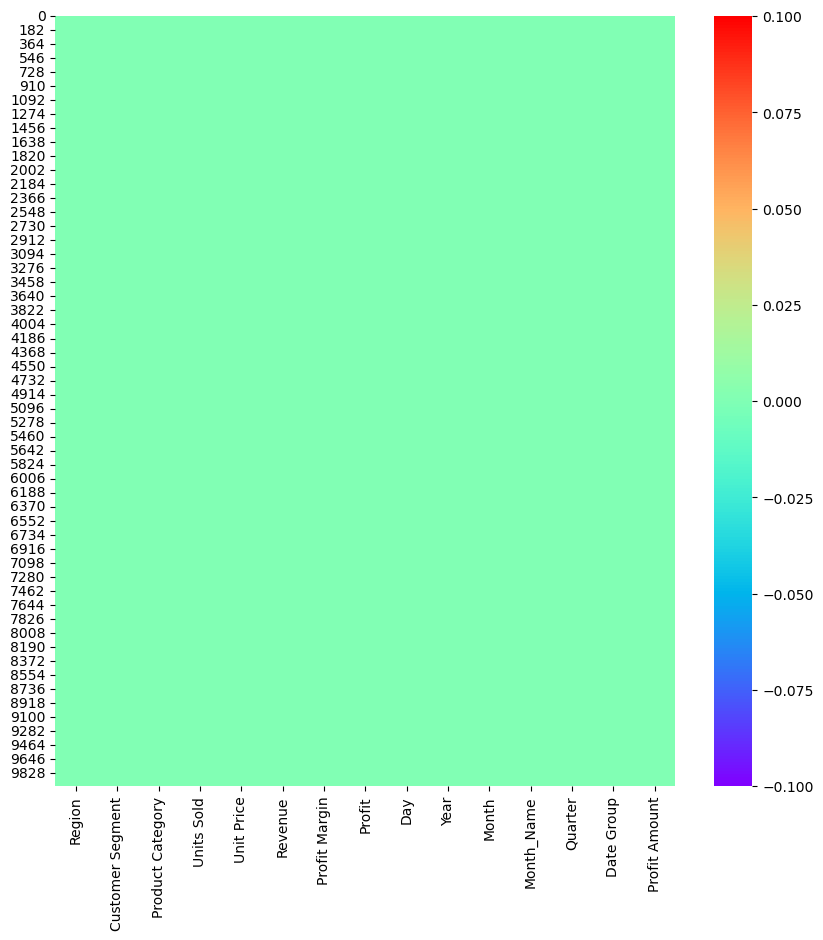

In [69]:
# visualise the missing data 
plt.figure(figsize = (10,10))
sns.heatmap( df.isnull(), cbar = True, cmap ="rainbow");

In [71]:
# columns in the dataset 
df.columns

Index(['Region', 'Customer Segment', 'Product Category', 'Units Sold',
       'Unit Price', 'Revenue', 'Profit Margin', 'Profit', 'Day', 'Year',
       'Month', 'Month_Name', 'Quarter', 'Date Group', 'Profit Amount'],
      dtype='object')

In [73]:
# Categorize , Categorical and numerical data 

categorical_df = df.select_dtypes(include = "object")
categorical_df.head(2)

,Region,Customer Segment,Product Category,Month_Name,Date Group
0,East,Small Business,Electronics,January,First week
1,West,Small Business,Electronics,January,First week


In [75]:
numerical_df = df.select_dtypes(exclude = "object")
numerical_df.head(2)

,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Quarter,Profit Amount
0,9,153.73,1383.57,0.07,10.7611,1,2021,1,1,96.8499
1,27,289.07,7804.89,0.13,37.5791,1,2021,1,1,1014.6357


## Numerical Data 

  ### Univariate analysis

In [78]:
numerical_df.head()

,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Quarter,Profit Amount
0,9,153.73,1383.57,0.07,10.7611,1,2021,1,1,96.8499
1,27,289.07,7804.89,0.13,37.5791,1,2021,1,1,1014.6357
2,41,491.73,20160.93,0.11,54.0903,1,2021,1,1,2217.7023
3,14,116.57,1631.98,0.11,12.8227,1,2021,1,1,179.5178
4,45,493.09,22189.05,0.21,103.5489,1,2021,1,1,4659.7005


In [80]:
# Check statistics for the numerical variables 

numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,10000.0,25.060400,14.103909,1.0000,13.00000,25.00000,37.000000,49.000
Unit Price,10000.0,252.609973,140.594368,10.0000,130.52500,253.22500,371.992500,499.900
Revenue,10000.0,6339.533679,5391.484434,12.6200,1885.33500,4801.04000,9662.000000,24381.910
Profit Margin,10000.0,0.174601,0.072439,0.0500,0.11000,0.17000,0.240000,0.300
Profit,10000.0,44.212447,32.343174,0.6060,18.06425,36.84015,64.496400,149.928
Day,10000.0,15.499200,8.754705,1.0000,8.00000,15.00000,23.000000,31.000
Year,10000.0,2021.124000,0.329598,2021.0000,2021.00000,2021.00000,2021.000000,2022.000
Month,10000.0,5.890400,3.646768,1.0000,2.00000,6.00000,9.000000,12.000
Quarter,10000.0,2.322400,1.157667,1.0000,1.00000,2.00000,3.000000,4.000
Profit Amount,10000.0,1108.404355,1114.769536,1.5464,273.36600,726.74700,1604.988675,6672.576


In [82]:
numerical_df.columns.to_list()

['Units Sold',
 'Unit Price',
 'Revenue',
 'Profit Margin',
 'Profit',
 'Day',
 'Year',
 'Month',
 'Quarter',
 'Profit Amount']

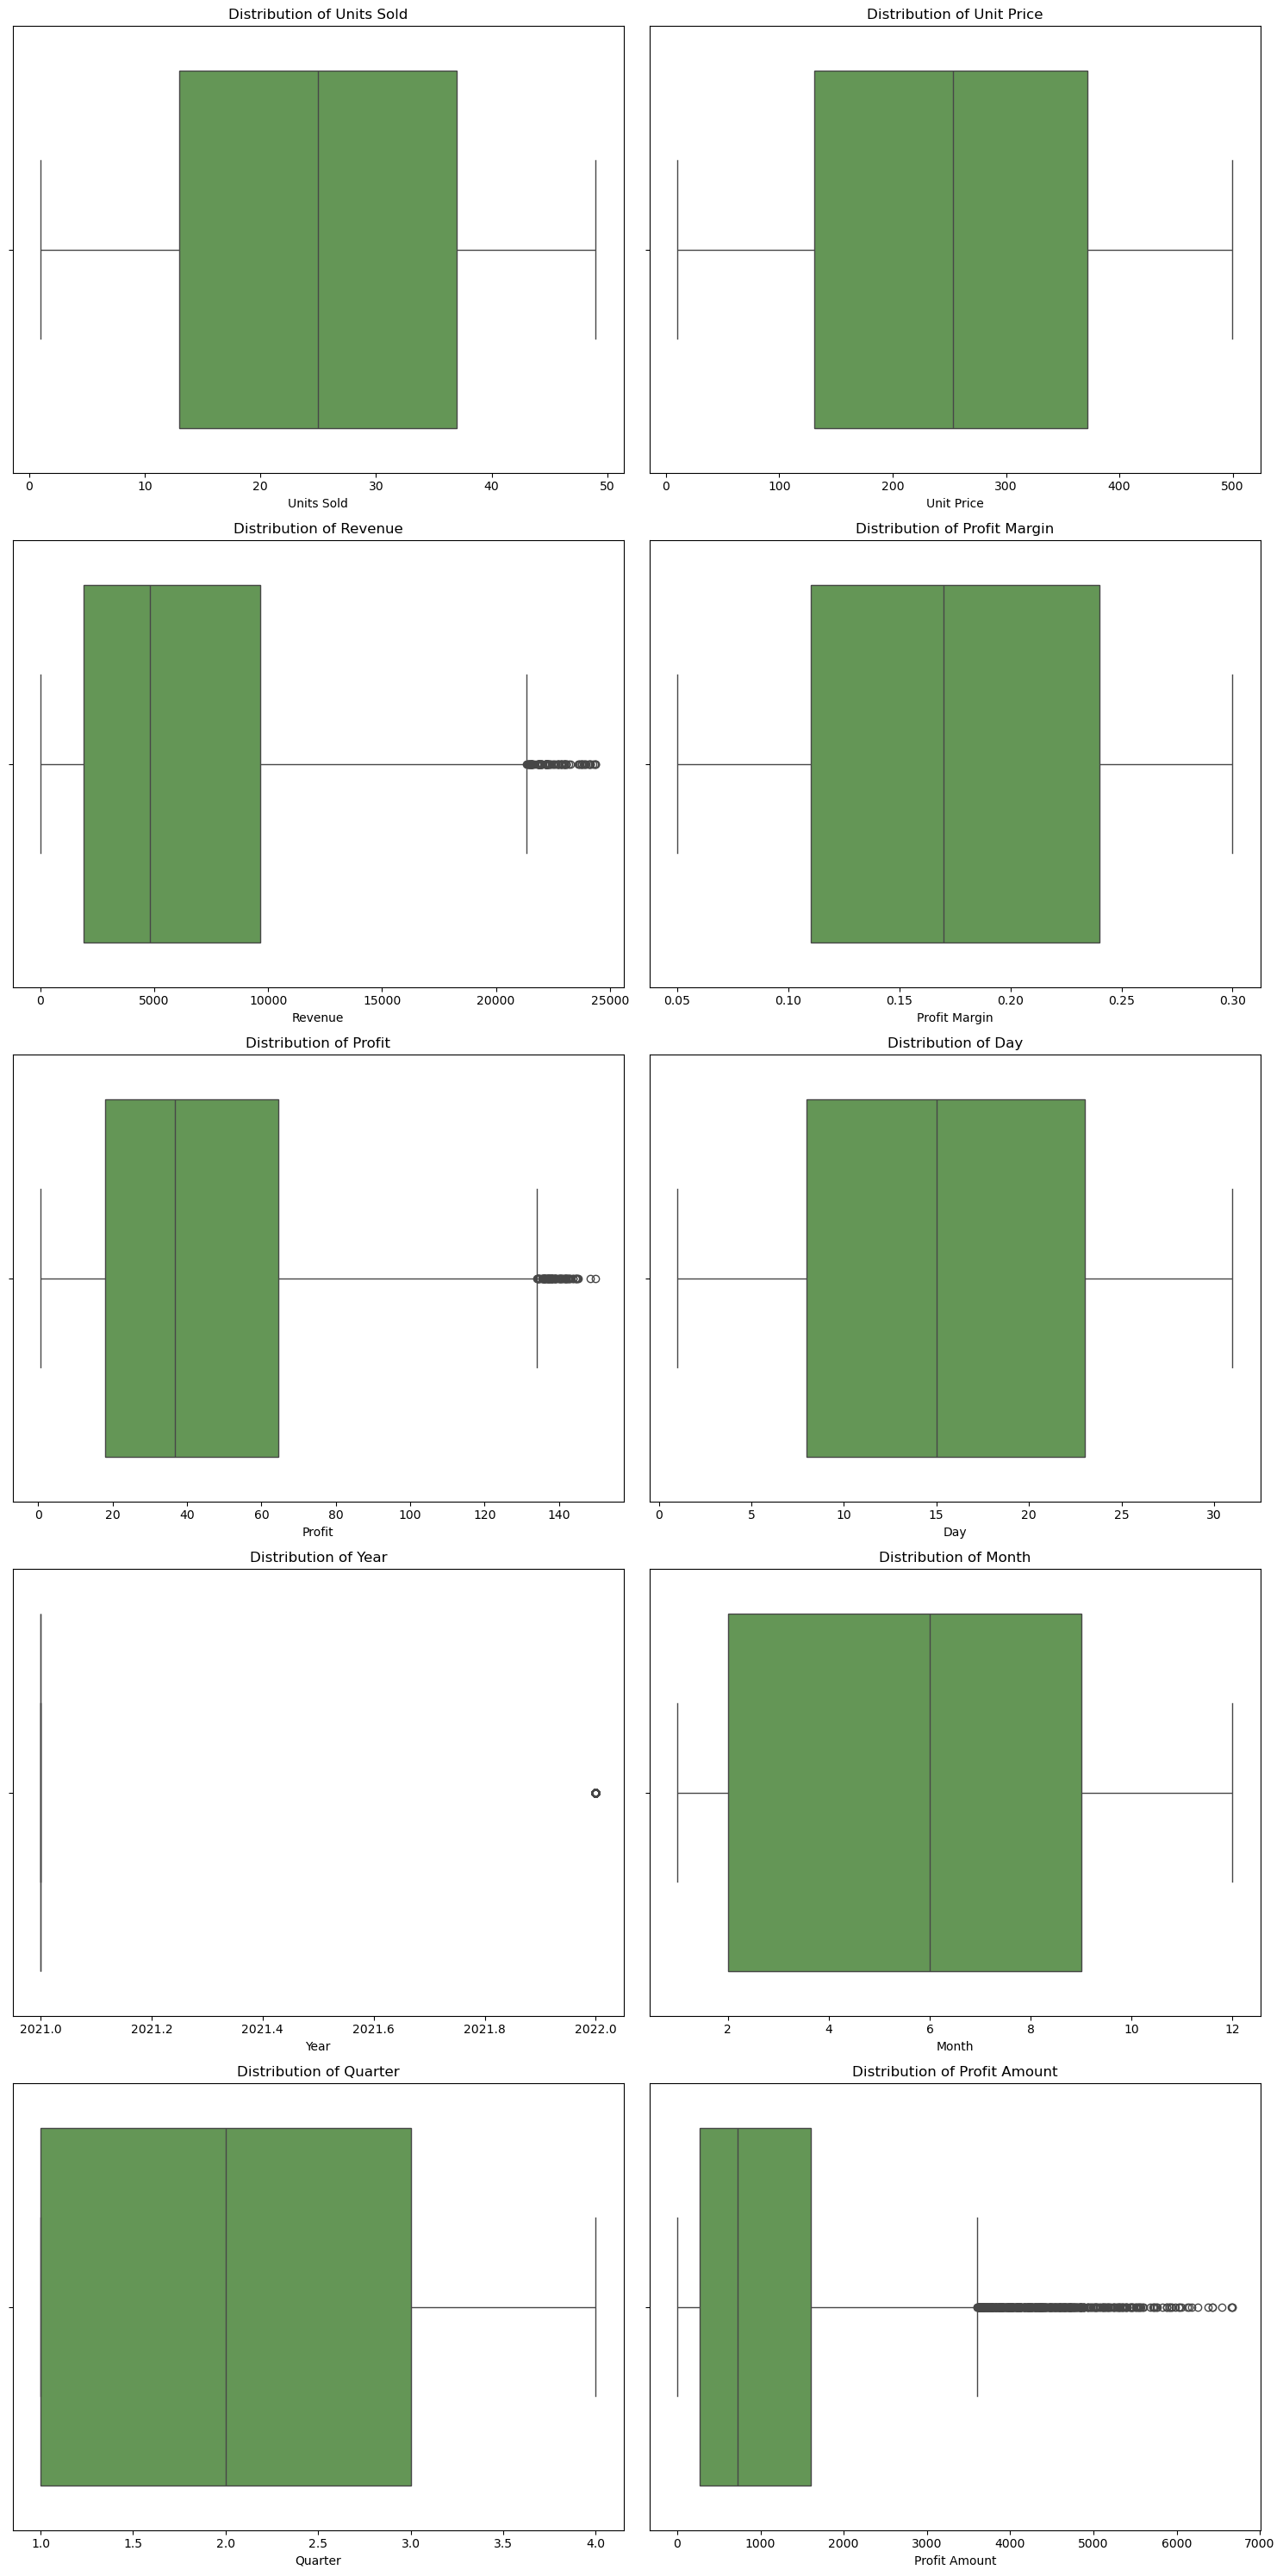

In [84]:
# Checking for outliers 
# Visualization of all the 4 columns as a boxplots individually to measure median tendency and frequency

df.columns.to_list()

numerical_cols = numerical_df.columns.to_list()


_, axes = plt.subplots(nrows =5, ncols =2, figsize = (15, 30))

position = axes.flatten()

for index, column_name in enumerate(numerical_cols):
    sns.boxplot(x=df[column_name] , palette= "gist_earth" , ax=position[index])
    position[index].set_title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

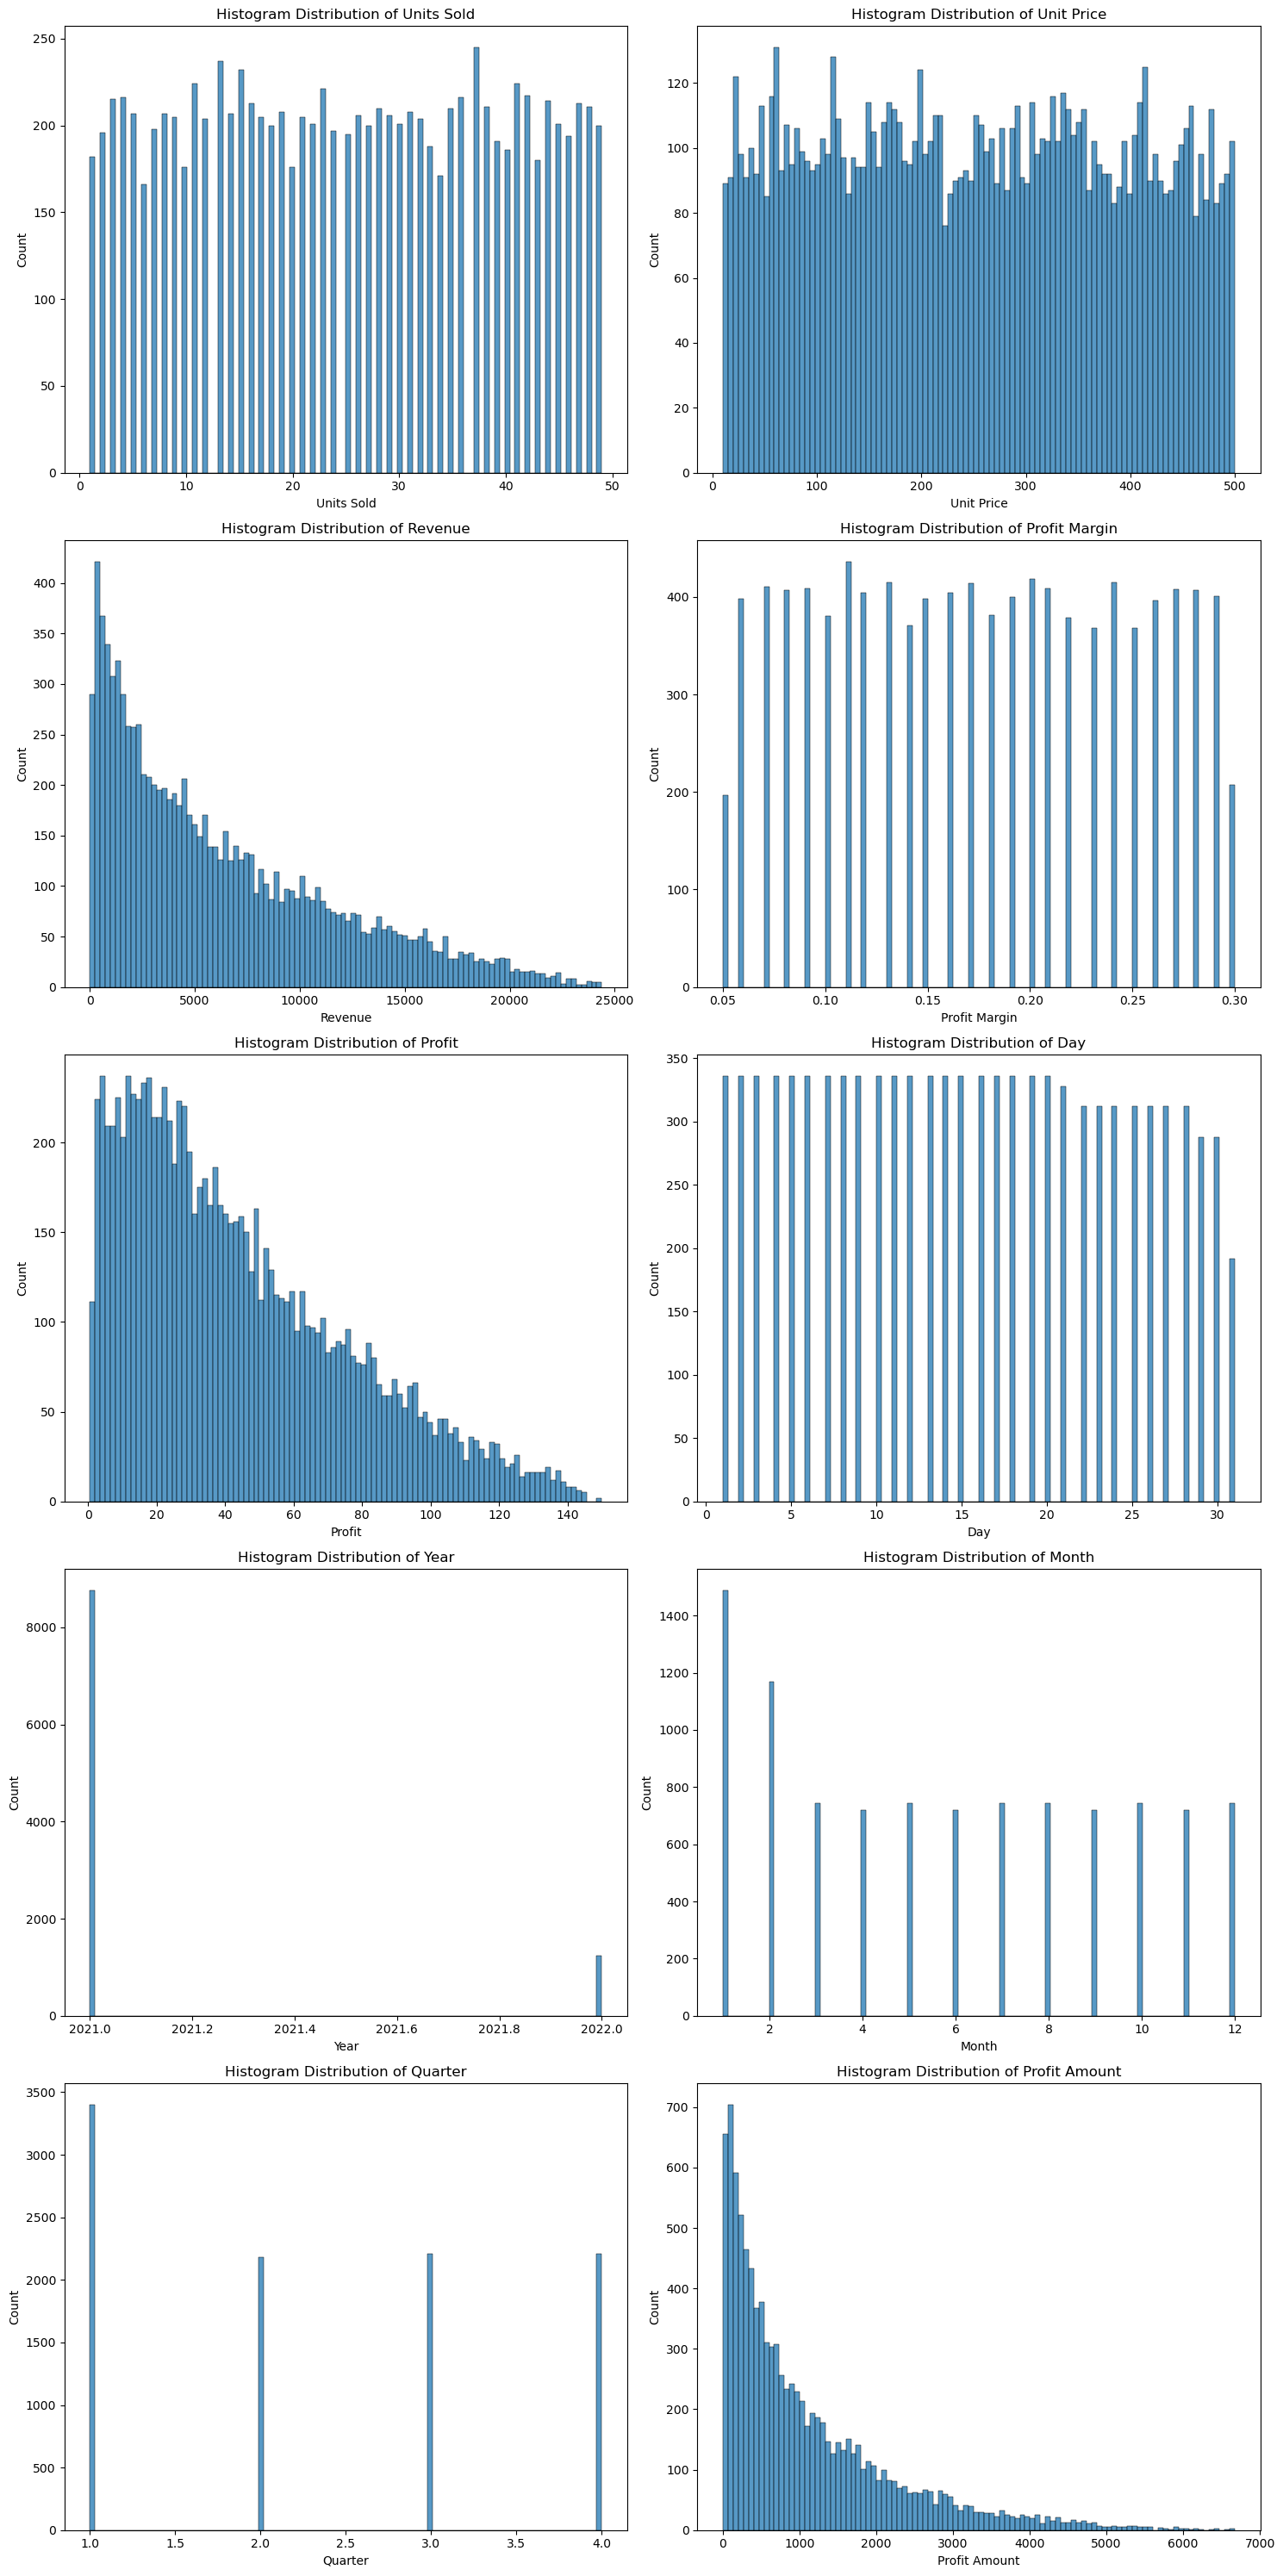

In [86]:
# Checking Histogram distribution of the data

numerical_cols = numerical_df.columns.to_list()

_, axes = plt.subplots(nrows =5, ncols =2, figsize = (15, 30))

position = axes.flatten()

for index, column_name in enumerate(numerical_cols):
    sns.histplot(numerical_df[column_name] , bins=100, palette= "gist_earth" , ax=position[index])
    position[index].set_title(f"Histogram Distribution of {column_name}")

plt.tight_layout()
plt.show();

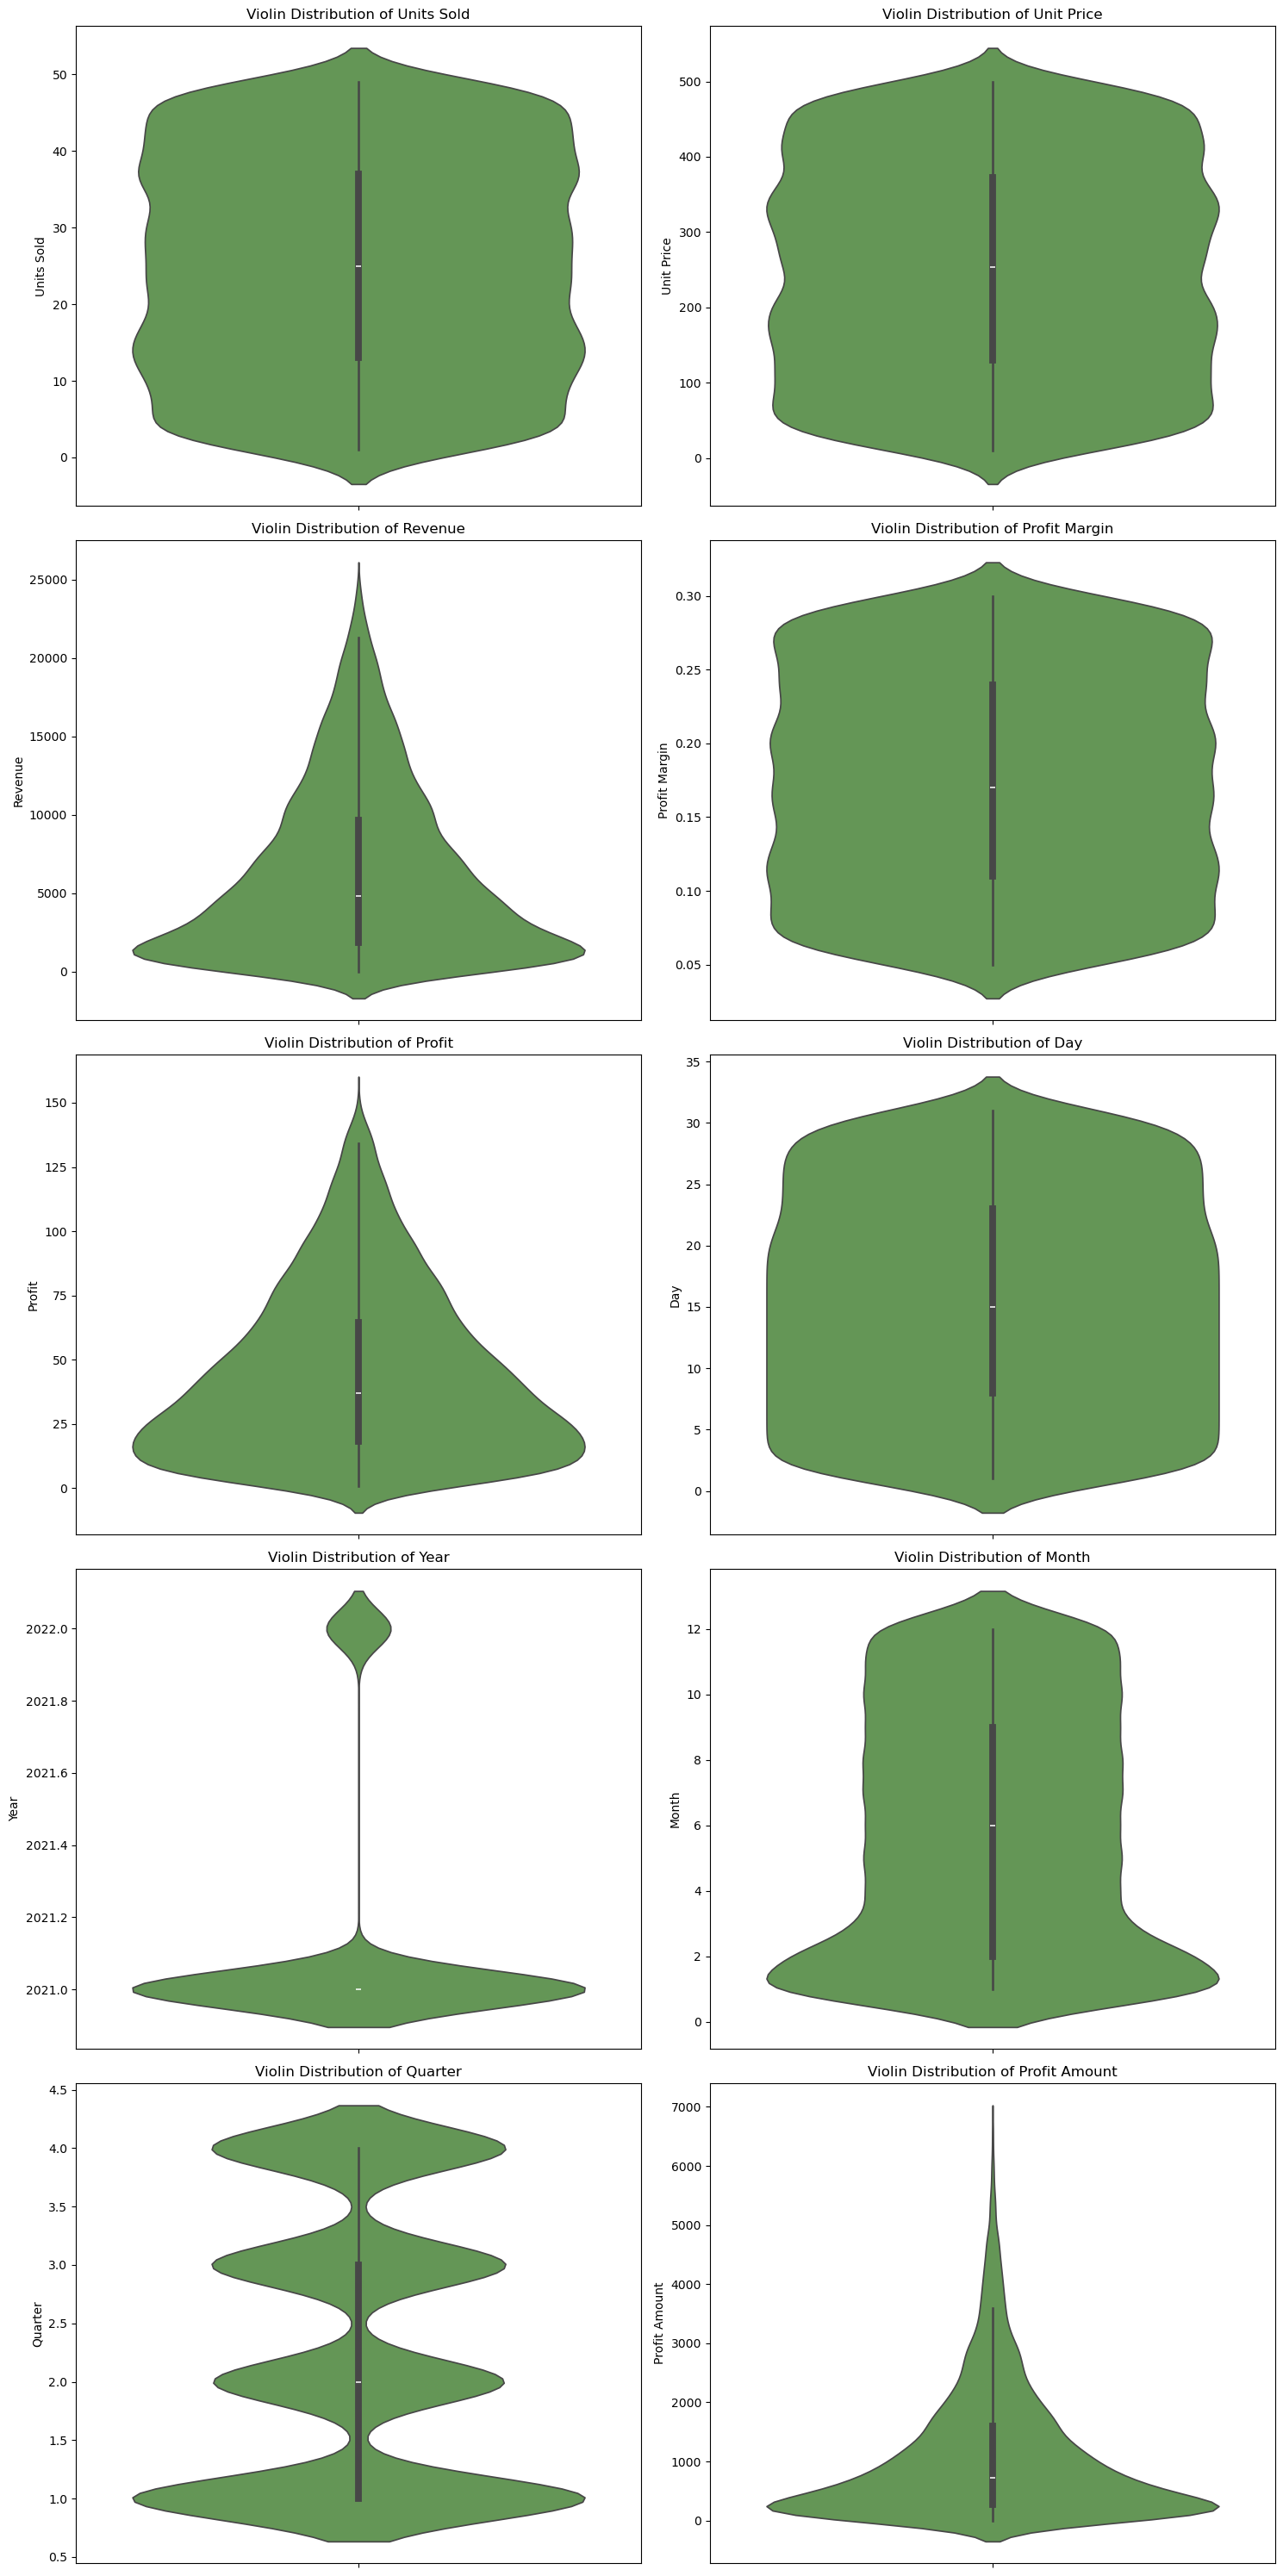

In [87]:
# Checking the histogram for distribution of the data

numerical_cols = numerical_df.columns.to_list()

_, axes = plt.subplots(nrows =5, ncols =2, figsize = (15, 30))

position = axes.flatten()

for index, column_name in enumerate(numerical_cols):
    sns.violinplot(numerical_df[column_name] , palette= "gist_earth" , ax=position[index])
    position[index].set_title(f"Violin Distribution of {column_name}")

plt.tight_layout()
plt.show();

### Numerical Analysis

In [91]:
numerical_df.columns

Index(['Units Sold', 'Unit Price', 'Revenue', 'Profit Margin', 'Profit', 'Day',
       'Year', 'Month', 'Quarter', 'Profit Amount'],
      dtype='object')

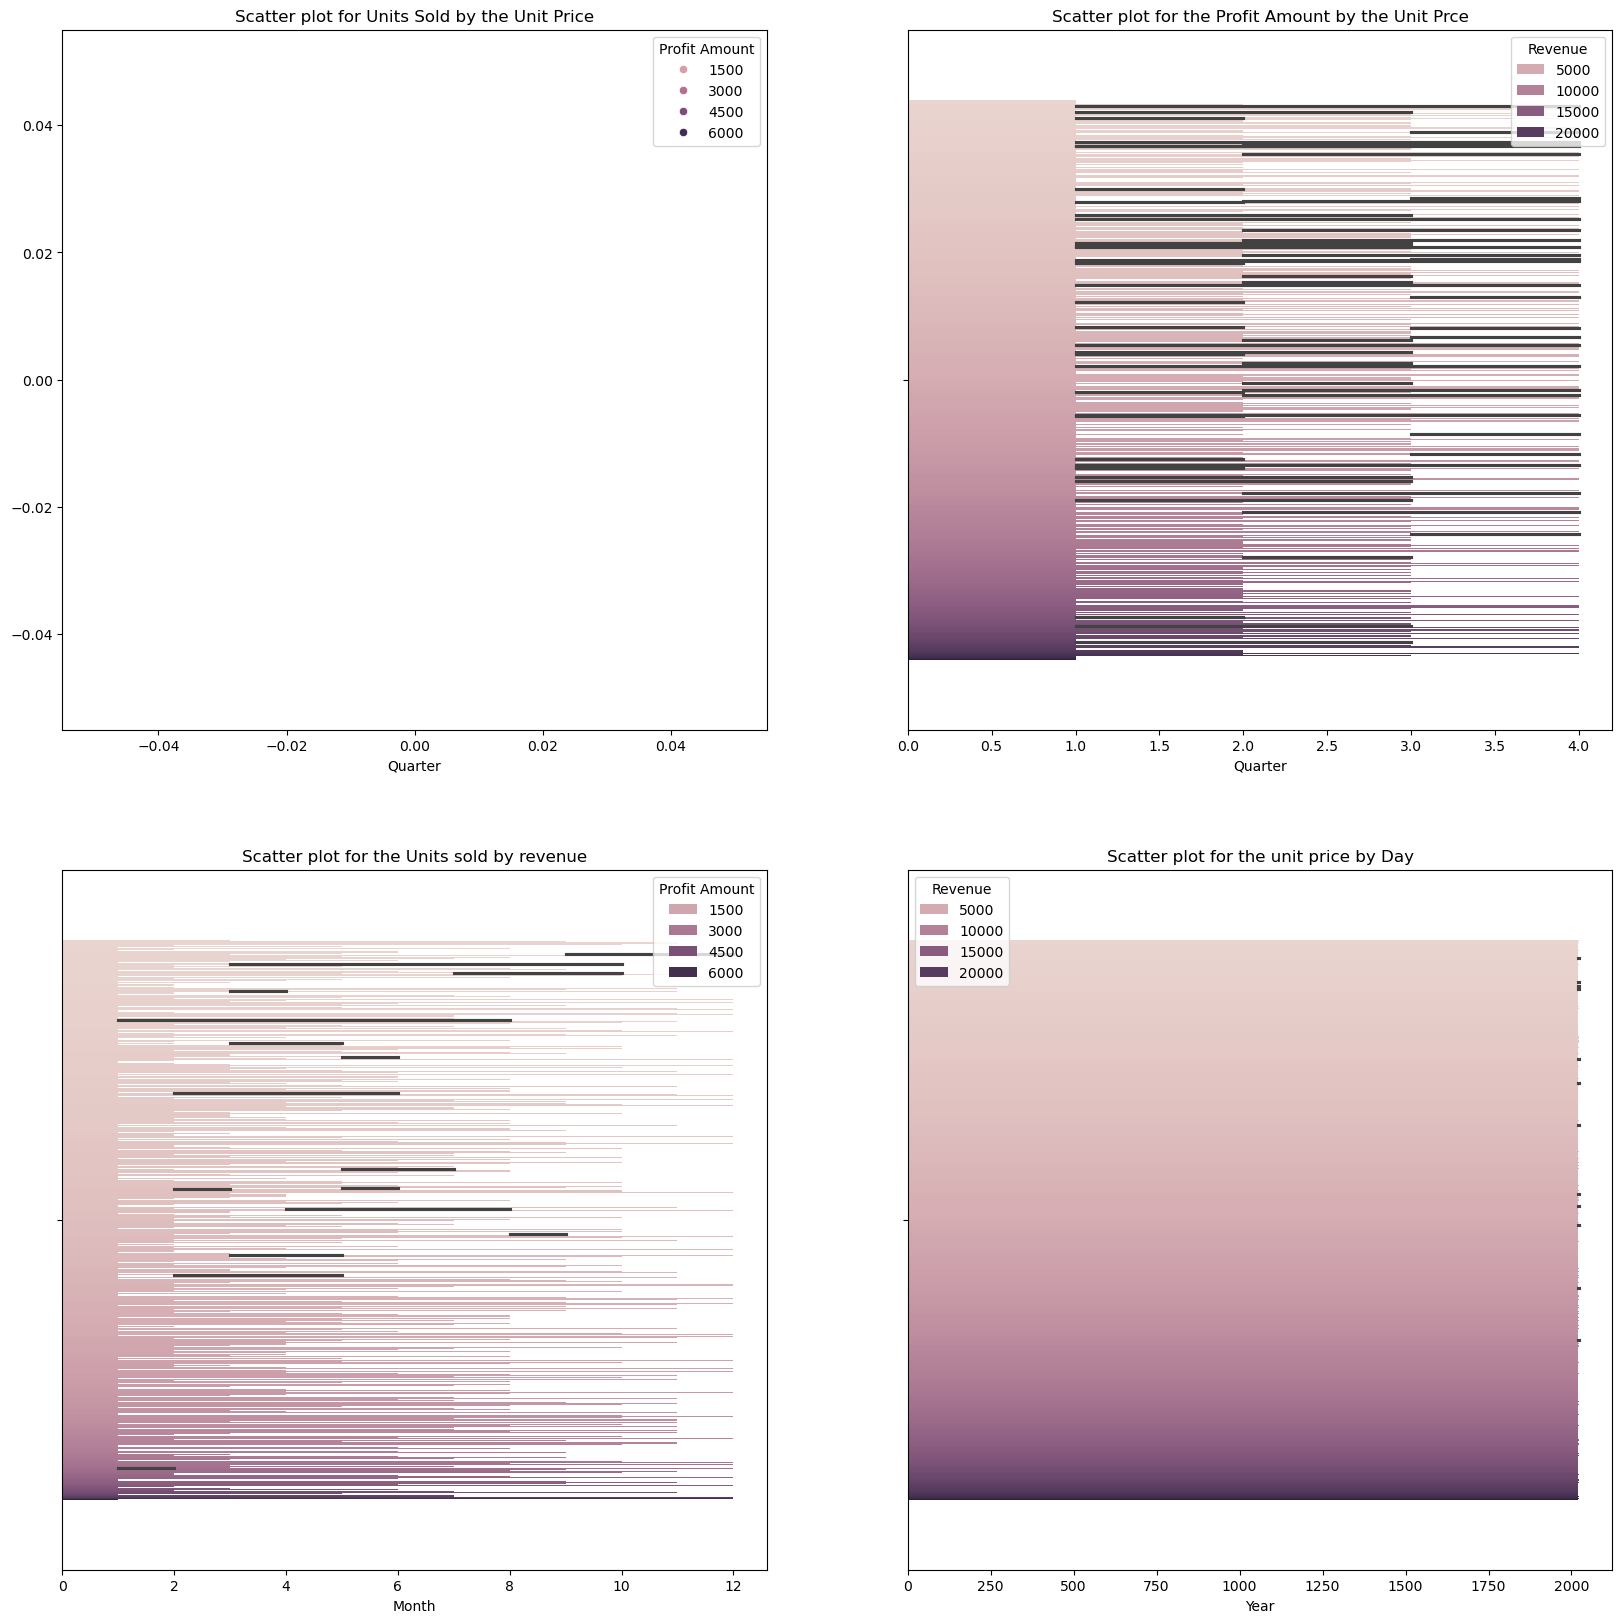

In [93]:
# Bivariate analysis of the numerical data

fig, axes = plt.subplots (nrows=2 , ncols=2 ,figsize = (20,20))

sns.scatterplot( x= "Quarter" , data=numerical_df, hue = 'Profit Amount', ax=axes[0,0] ) 
axes[0,0].set_title("Scatter plot for Units Sold by the Unit Price")

sns.barplot( x= "Quarter", data=numerical_df, hue = 'Revenue', ax=axes[0,1])
axes[0,1].set_title("Scatter plot for the Profit Amount by the Unit Prce")

sns.barplot( x= "Month", data=numerical_df, hue = 'Profit Amount', ax=axes[1,0])
axes[1,0].set_title("Scatter plot for the Units sold by revenue")

sns.barplot( x= "Year", data=numerical_df , hue = 'Revenue', ax=axes[1,1])
axes[1,1].set_title("Scatter plot for the unit price by Day")

plt.show();

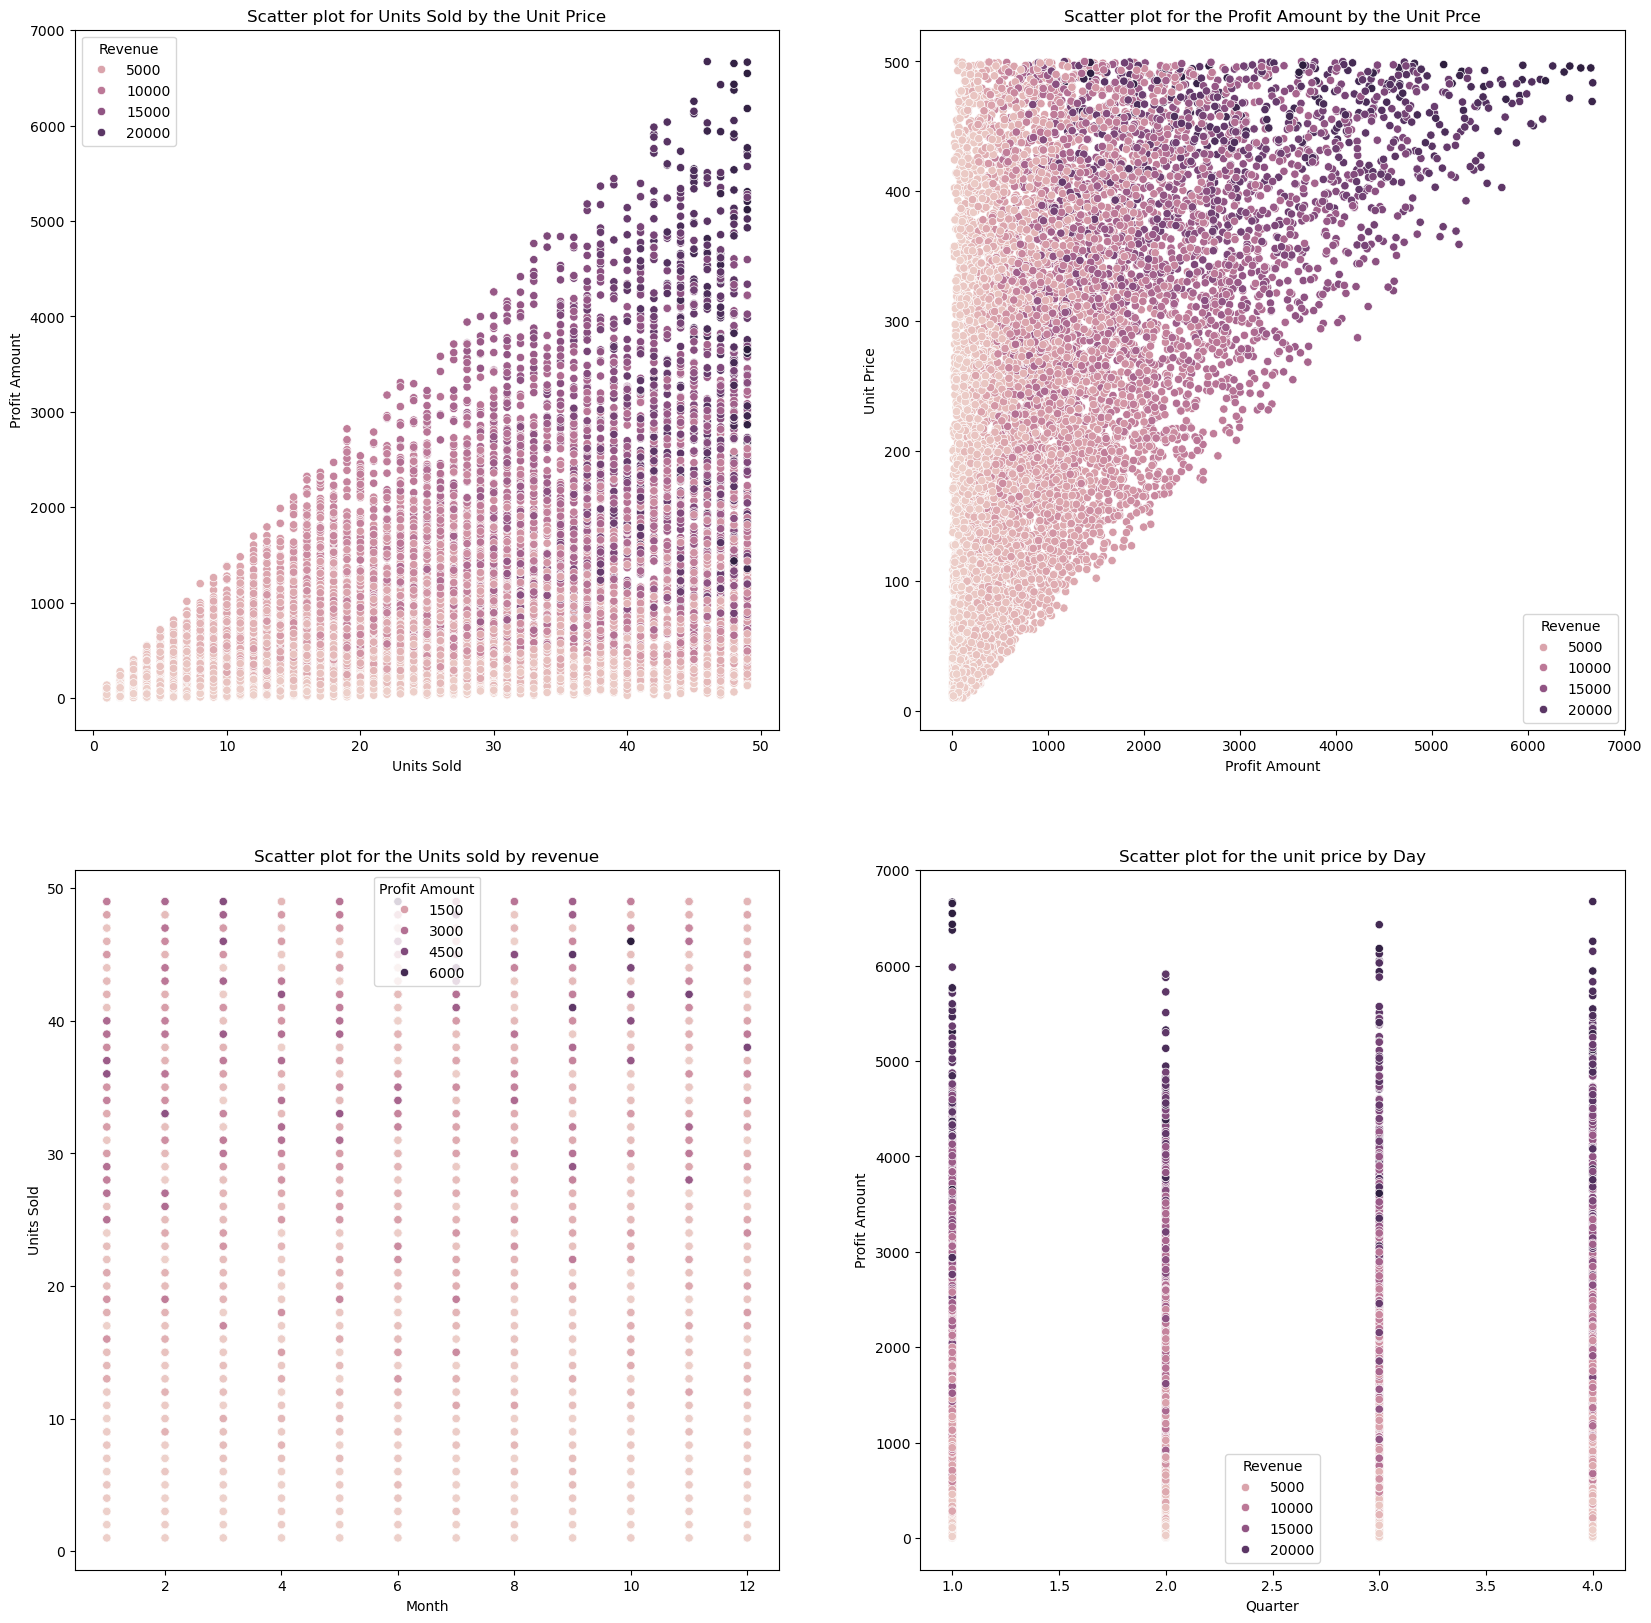

In [94]:
# Multivariate analysis of the numerical data

fig, axes = plt.subplots (nrows=2 , ncols=2 ,figsize = (20,20))

sns.scatterplot( x= "Units Sold", y='Profit Amount' , data=numerical_df, hue = 'Revenue', ax=axes[0,0] ) 
axes[0,0].set_title("Scatter plot for Units Sold by the Unit Price")


sns.scatterplot( x= "Profit Amount", y='Unit Price' , data=numerical_df, hue = 'Revenue', ax=axes[0,1])
axes[0,1].set_title("Scatter plot for the Profit Amount by the Unit Prce")


sns.scatterplot( x= "Month", y='Units Sold' , data=numerical_df, hue = 'Profit Amount', ax=axes[1,0])
axes[1,0].set_title("Scatter plot for the Units sold by revenue")

sns.scatterplot( x= "Quarter", y='Profit Amount', data=numerical_df, hue = 'Revenue', ax=axes[1,1])
axes[1,1].set_title("Scatter plot for the unit price by Day")

plt.show();

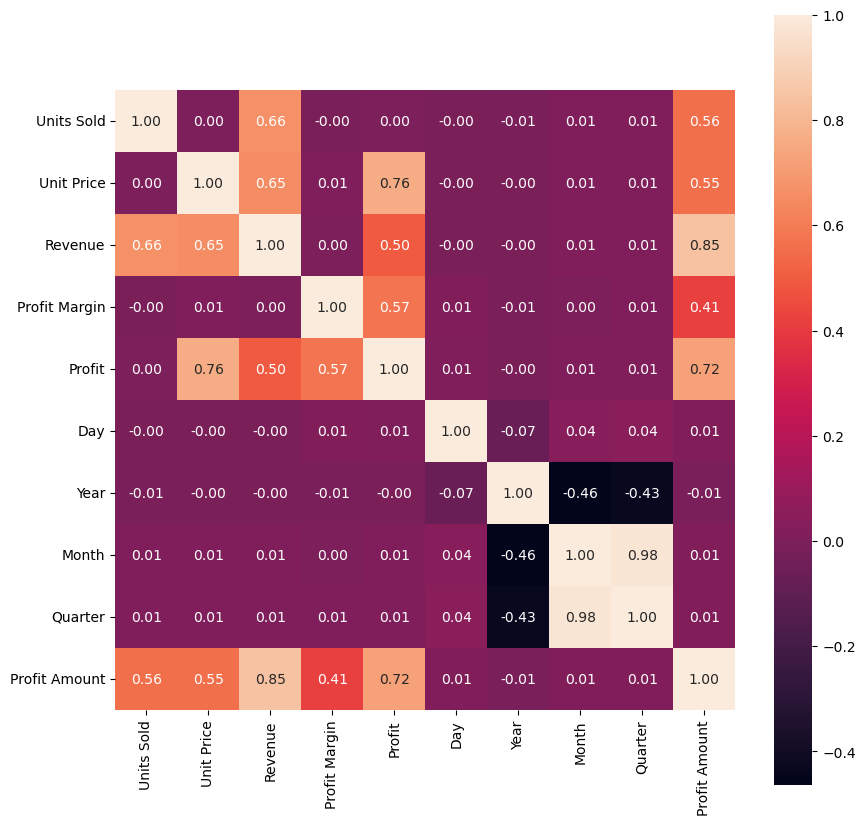

In [95]:
## Numerical data Coorelation

corr = numerical_df.corr

plt.figure(figsize = (10,10))

hm = sns.heatmap(corr(), cbar=True , annot=True, square =True, fmt='.2f', annot_kws={"size":10});

### Categorical Data

### Univariate Analysis


In [98]:
categorical_df.head(2)


,Region,Customer Segment,Product Category,Month_Name,Date Group
0,East,Small Business,Electronics,January,First week
1,West,Small Business,Electronics,January,First week


In [99]:
# change of the categorical data into a list

categorical_df.columns.to_list()

['Region', 'Customer Segment', 'Product Category', 'Month_Name', 'Date Group']

In [100]:
# Unique features of the categorical columns

cat_columns = categorical_df.columns.to_list()

for features in cat_columns:

    print(f" {features} ------  {categorical_df[features].unique()}")
    print("\n")


 Region ------  ['East' 'West' 'North' 'South']


 Customer Segment ------  ['Small Business' 'Consumer' 'Corporate']


 Product Category ------  ['Electronics' 'Office Supplies' 'Furniture']


 Month_Name ------  ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


 Date Group ------  ['First week' 'Second week' 'Third week' 'Fourth week']




In [101]:
categorical_df.head()

,Region,Customer Segment,Product Category,Month_Name,Date Group
0,East,Small Business,Electronics,January,First week
1,West,Small Business,Electronics,January,First week
2,North,Small Business,Office Supplies,January,First week
3,East,Consumer,Electronics,January,First week
4,East,Small Business,Electronics,January,First week


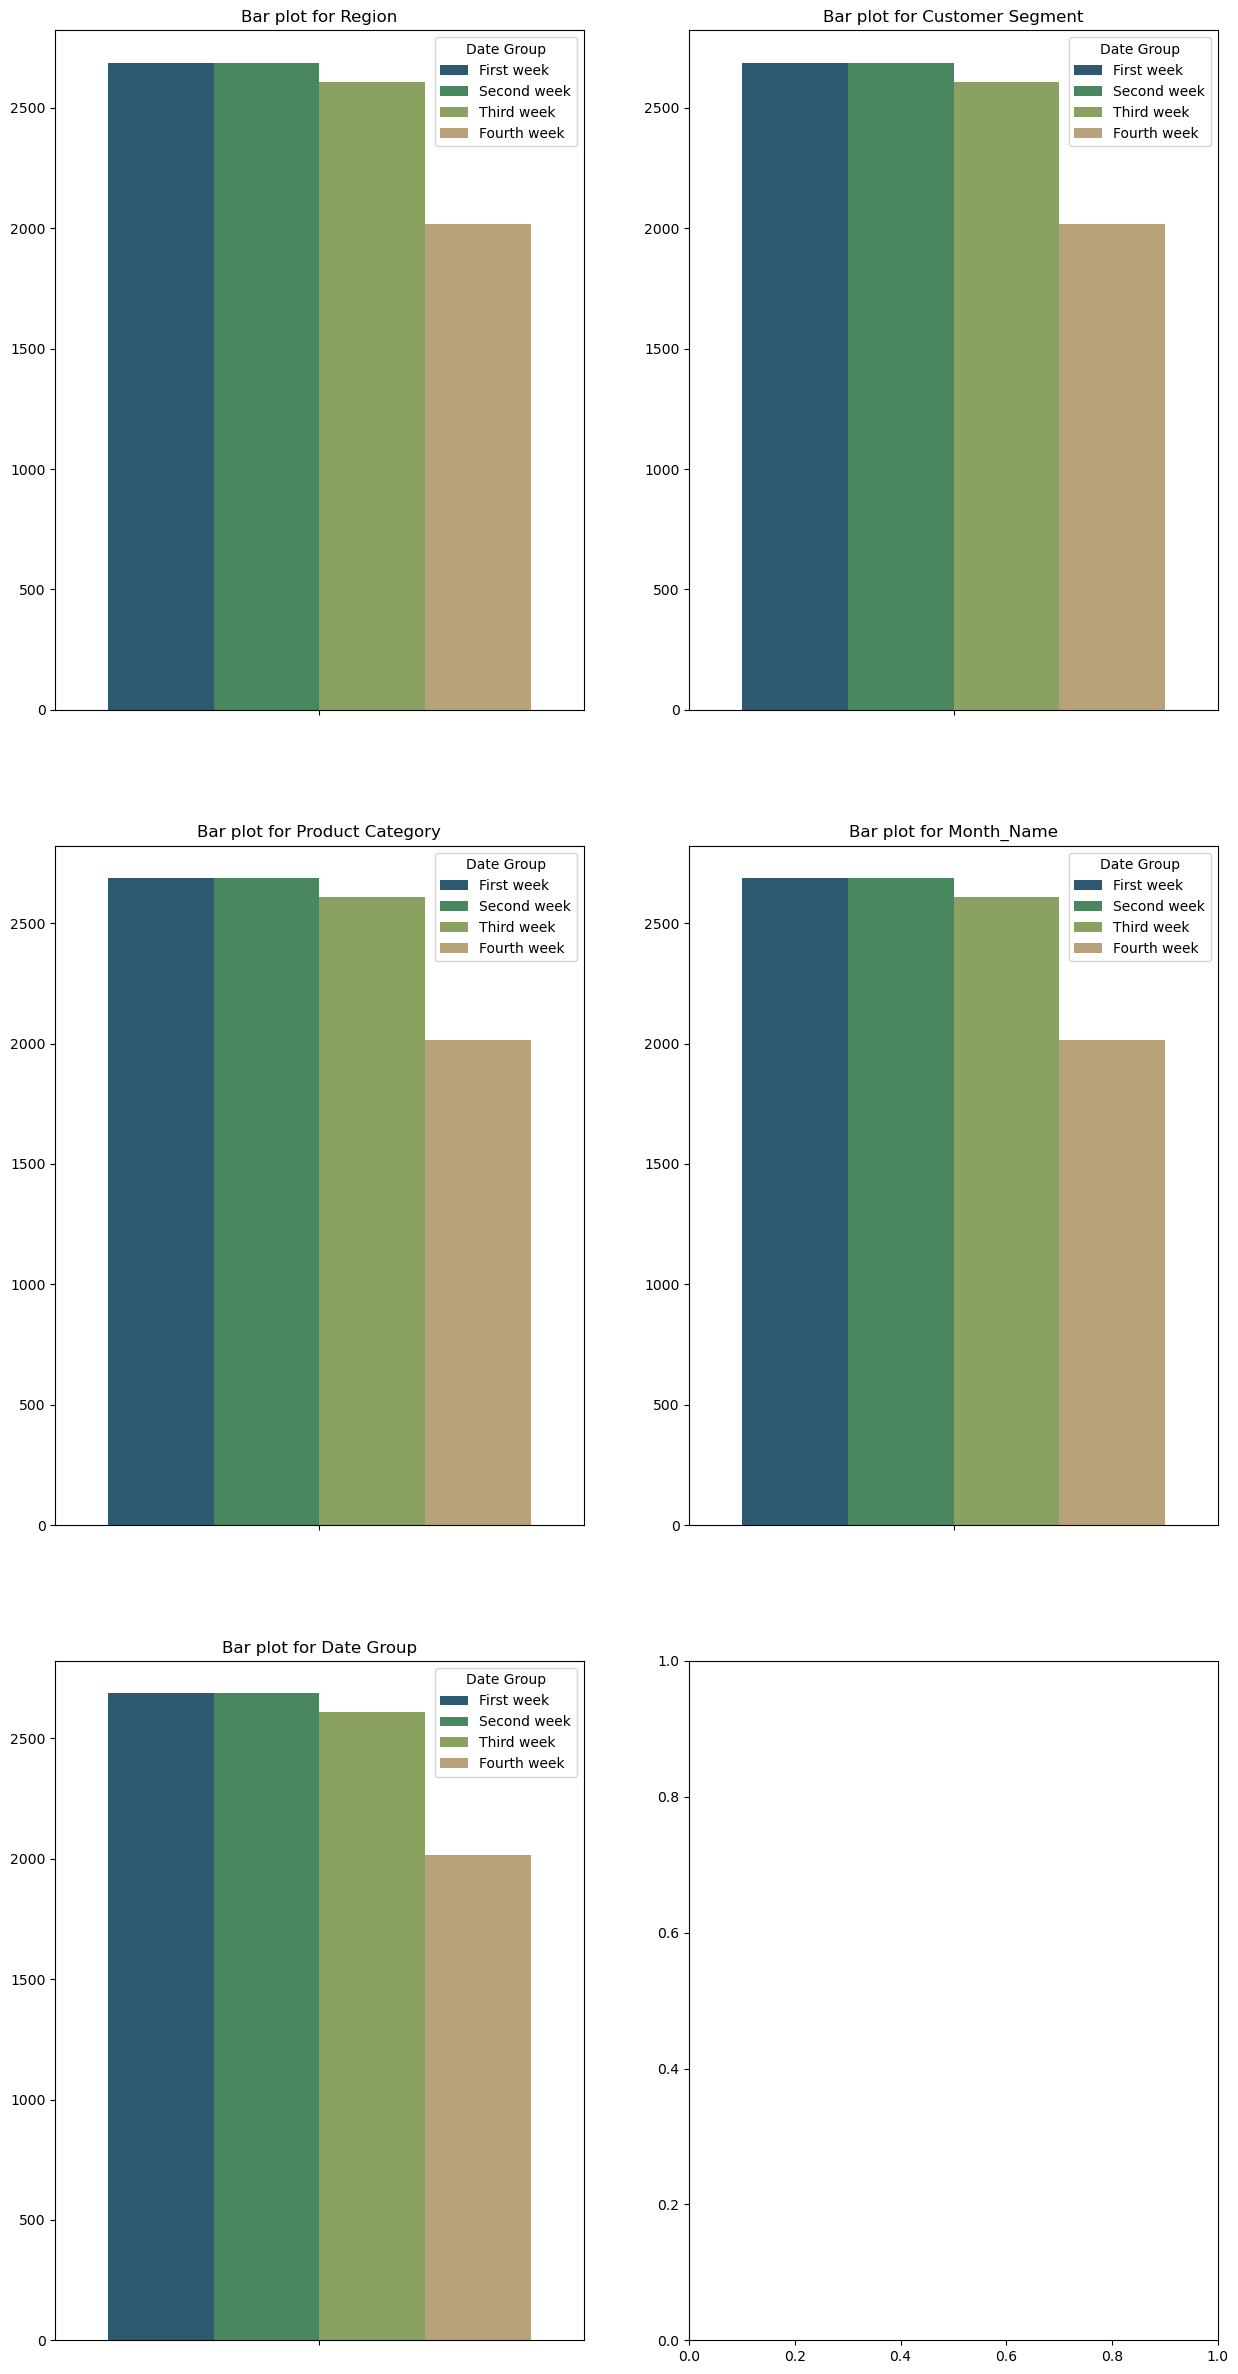

In [102]:
# Univariate categorical analysis by barplots


fig, axes = plt.subplots (nrows=3 , ncols=2, figsize = (15,30))
position = axes.flatten()

for index, feature in enumerate(cat_columns):
 sns.barplot(hue = categorical_df[features].value_counts().index, y =categorical_df[features].value_counts().values, 
               ax = position[index], palette= "gist_earth" )
 position[index].set_title(f"Bar plot for {feature}")


plt.show()                      



### Bivariate analysis

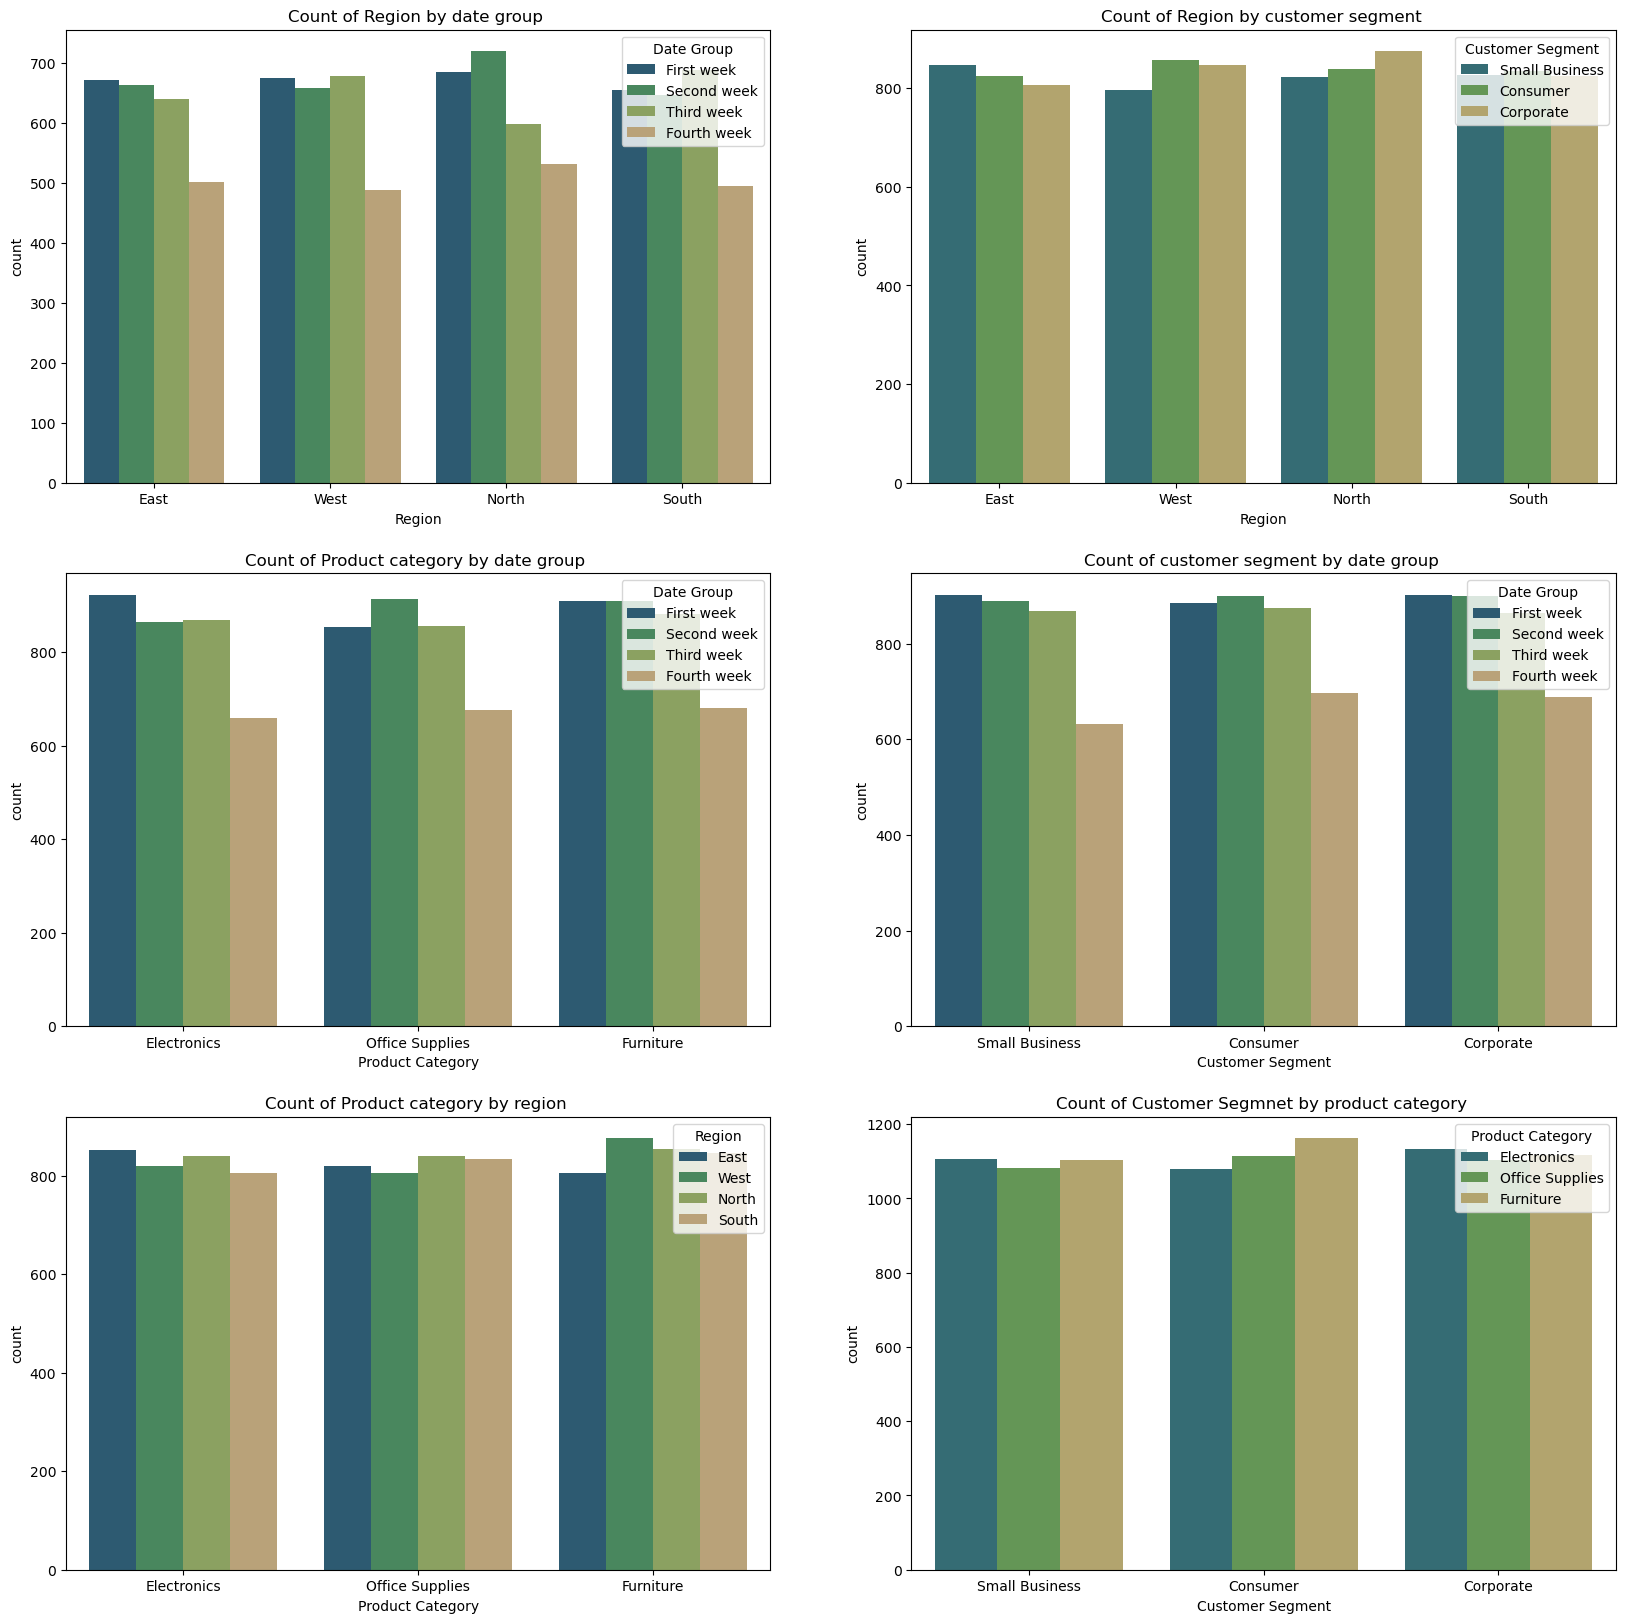

In [104]:
# bivariate analysis of the categorical data

fig, axes = plt.subplots ( nrows=3, ncols=2 , figsize = (20,20))

sns.countplot( x= "Region" , hue ="Date Group", data = categorical_df, ax=axes[0,0], palette = 'gist_earth')
axes[0,0].set_title('Count of Region by date group ')

sns.countplot( x= "Region" , hue ="Customer Segment", data = categorical_df, ax=axes[0,1], palette = 'gist_earth')
axes[0,1].set_title('Count of Region by customer segment ')

sns.countplot( x= "Product Category" , hue ="Date Group", data = categorical_df, ax=axes[1,0], palette = 'gist_earth')
axes[1,0].set_title('Count of Product category by date group ')

sns.countplot( x= "Customer Segment" , hue ="Date Group", data = categorical_df, ax=axes[1,1], palette = 'gist_earth')
axes[1,1].set_title('Count of customer segment by date group ')

sns.countplot( x= "Product Category" , hue ="Region", data = categorical_df, ax=axes[2,0], palette = 'gist_earth')
axes[2,0].set_title('Count of Product category by region ')

sns.countplot( x= "Customer Segment" , hue ="Product Category", data = categorical_df, ax=axes[2,1], palette = 'gist_earth')
axes[2,1].set_title('Count of Customer Segmnet by product category ')

plt.tight_layout
plt.show;

## Multivariate Analysis

Analysis of more than one variable. 

In [184]:
df.head(2)

,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Month_Name,Quarter,Date Group,Profit Amount
0,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,NaN,NaN,NaN,NaN,NaN,Fourth week,96.8499
1,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,NaN,NaN,NaN,NaN,NaN,Fourth week,1014.6357


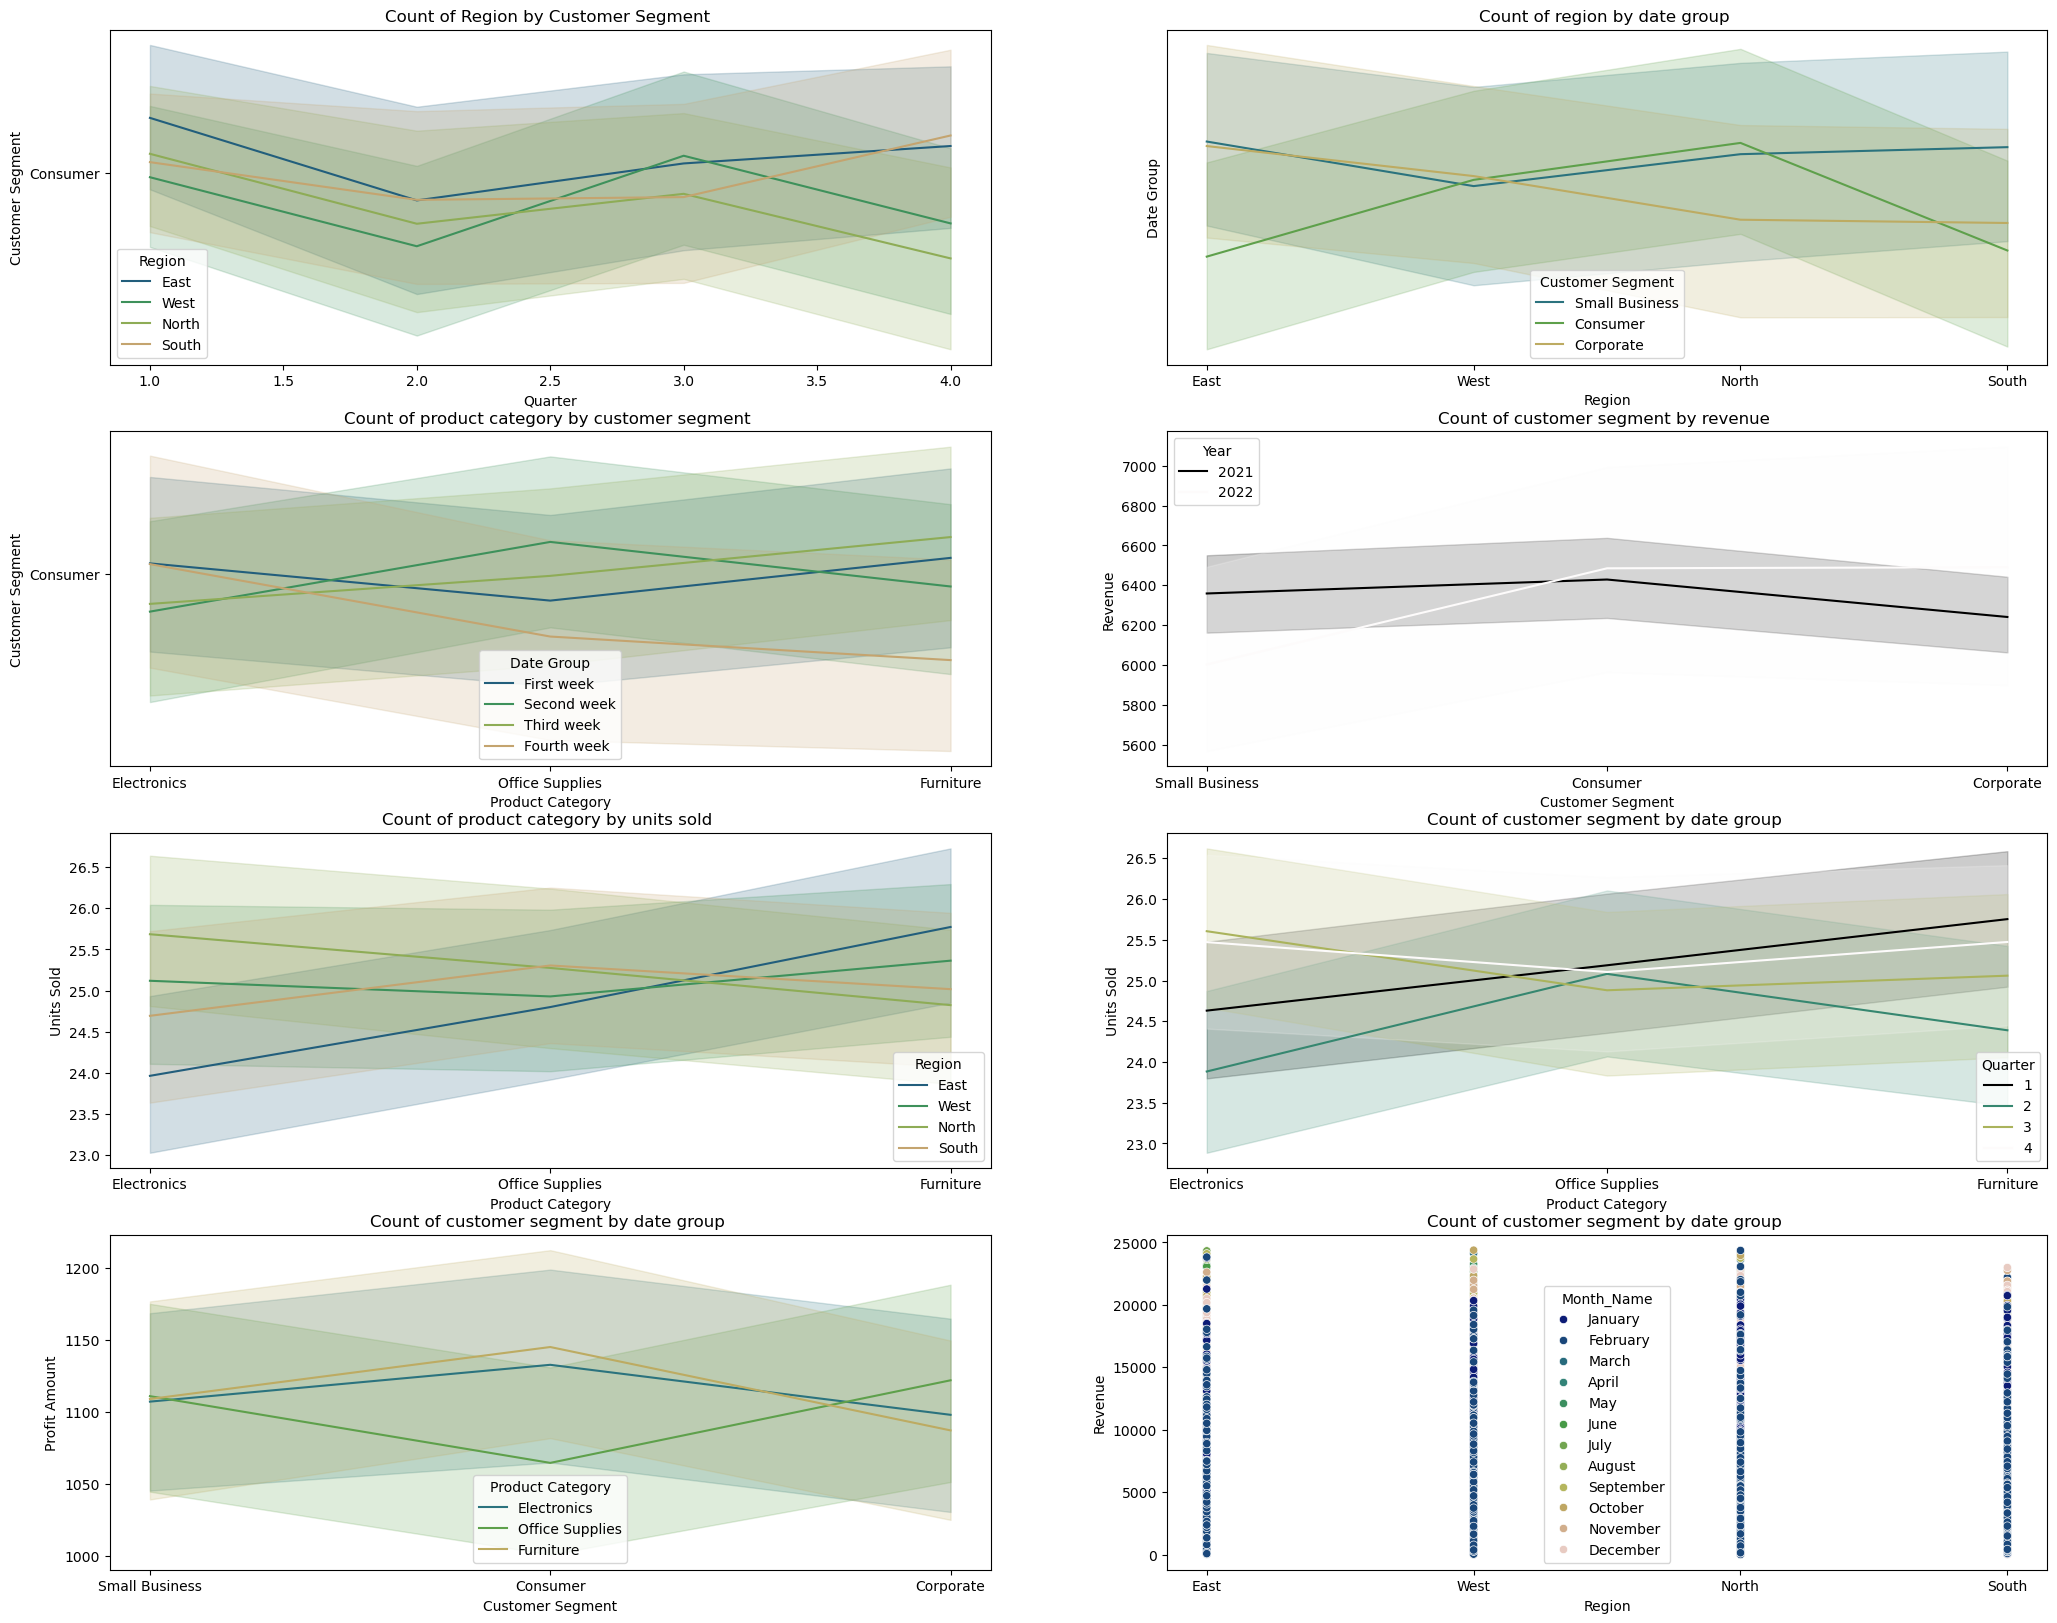

In [116]:
# Multivariate analysis of the categorical data

fig, axes = plt.subplots ( nrows=4, ncols=2 , figsize = (25,20))

sns.lineplot( x= "Quarter" , y="Customer Segment" , hue ="Region", data = df, ax=axes[0,0], palette = 'gist_earth')
axes[0,0].set_title('Count of Region by Customer Segment ')

sns.lineplot( x= "Region" , y="Date Group", hue ="Customer Segment", data = df, ax=axes[0,1], palette = 'gist_earth')
axes[0,1].set_title('Count of region by date group ')

sns.lineplot( x= "Product Category" , y="Customer Segment", hue ="Date Group", data = df, ax=axes[1,0], palette = 'gist_earth')
axes[1,0].set_title('Count of product category by customer segment ')

sns.lineplot( x= "Customer Segment", y="Revenue" , hue ="Year", data = df, ax=axes[1,1], palette = 'gist_earth')
axes[1,1].set_title('Count of customer segment by revenue ')

sns.lineplot( x= "Product Category" , y="Units Sold",  hue ="Region", data = df, ax=axes[2,0], palette = 'gist_earth')
axes[2,0].set_title('Count of product category by units sold ')

sns.lineplot( x= "Product Category" , y="Units Sold", hue ="Quarter", data = df, ax=axes[2,1], palette = 'gist_earth')
axes[2,1].set_title('Count of customer segment by date group ')

sns.lineplot( x= "Customer Segment" , y="Profit Amount", hue ="Product Category", data = df, ax=axes[3,0], palette = 'gist_earth')
axes[3,0].set_title('Count of customer segment by date group ')

sns.scatterplot( x= "Region" , y="Revenue", hue ="Month_Name", data = df, ax=axes[3,1], palette = 'gist_earth')
axes[3,1].set_title('Count of customer segment by date group ')

plt.tight_layout
plt.show;

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            10000 non-null  object 
 1   Customer Segment  10000 non-null  object 
 2   Product Category  10000 non-null  object 
 3   Units Sold        10000 non-null  int64  
 4   Unit Price        10000 non-null  float64
 5   Revenue           10000 non-null  float64
 6   Profit Margin     10000 non-null  float64
 7   Profit            10000 non-null  float64
 8   Day               0 non-null      float64
 9   Year              0 non-null      float64
 10  Month             0 non-null      float64
 11  Month_Name        0 non-null      object 
 12  Quarter           0 non-null      float64
 13  Date Group        10000 non-null  object 
 14  Profit Amount     10000 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.1+ MB


In [187]:
df.head()

,Region,Customer Segment,Product Category,Units Sold,Unit Price,Revenue,Profit Margin,Profit,Day,Year,Month,Month_Name,Quarter,Date Group,Profit Amount
0,East,Small Business,Electronics,9,153.73,1383.57,0.07,10.7611,NaN,NaN,NaN,NaN,NaN,Fourth week,96.8499
1,West,Small Business,Electronics,27,289.07,7804.89,0.13,37.5791,NaN,NaN,NaN,NaN,NaN,Fourth week,1014.6357
2,North,Small Business,Office Supplies,41,491.73,20160.93,0.11,54.0903,NaN,NaN,NaN,NaN,NaN,Fourth week,2217.7023
3,East,Consumer,Electronics,14,116.57,1631.98,0.11,12.8227,NaN,NaN,NaN,NaN,NaN,Fourth week,179.5178
4,East,Small Business,Electronics,45,493.09,22189.05,0.21,103.5489,NaN,NaN,NaN,NaN,NaN,Fourth week,4659.7005


##### Handle Missing Values in date

In [189]:
df['Day'].fillna(1, inplace=True)
df['Year'].fillna(2021, inplace=True)
df['Month'].fillna(1, inplace=True)
df['Month_Name'].fillna('January', inplace=True)
df['Quarter'].fillna(1, inplace=True)

In [190]:
df.isnull().sum()

Region              0
Customer Segment    0
Product Category    0
Units Sold          0
Unit Price          0
Revenue             0
Profit Margin       0
Profit              0
Day                 0
Year                0
Month               0
Month_Name          0
Quarter             0
Date Group          0
Profit Amount       0
dtype: int64

In [191]:
print(df.dtypes)


Region               object
Customer Segment     object
Product Category     object
Units Sold            int64
Unit Price          float64
Revenue             float64
Profit Margin       float64
Profit              float64
Day                 float64
Year                float64
Month               float64
Month_Name           object
Quarter             float64
Date Group           object
Profit Amount       float64
dtype: object


In [192]:
# Convert Day, Year, Month, and Quarter to integers
df['Day'] = df['Day'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Quarter'] = df['Quarter'].astype(int)

# Check the updated data types
print(df.dtypes)


Region               object
Customer Segment     object
Product Category     object
Units Sold            int64
Unit Price          float64
Revenue             float64
Profit Margin       float64
Profit              float64
Day                   int32
Year                  int32
Month                 int32
Month_Name           object
Quarter               int32
Date Group           object
Profit Amount       float64
dtype: object


#### Feature Engineering

1. Revenue and Profit Per Unit

Calculate revenue and profit generated per unit sold

In [195]:
#Calculate revenue and profit generated per unit sold:
df['Revenue Per Unit'] = df['Revenue'] / df['Units Sold']
df['Profit Per Unit'] = df['Profit'] / df['Units Sold']

2. Profitability Metrics

Create a binary feature to indicate whether the product is highly profitable

In [ ]:
# Define a threshold for high profitability (adjust as needed)
profit_margin_threshold = 0.15
df['High Profit Margin'] = (df['Profit Margin'] > profit_margin_threshold).astype(int)


In [ ]:
df

3. Seasonality

Extract seasonality patterns based on the Month column


In [ ]:
# Create a season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)


4. Customer Segment Insights

Create a feature for customer importance based on average revenue or profit

In [ ]:
# Calculate average revenue and profit per customer segment
segment_stats = df.groupby('Customer Segment')[['Revenue', 'Profit']].mean().reset_index()
segment_stats.columns = ['Customer Segment', 'Avg Revenue', 'Avg Profit']

# Merge back to the original DataFrame
df = df.merge(segment_stats, on='Customer Segment', how='left')


In [ ]:
df

In [ ]:
df.info()

In [ ]:
# Drop irrelevant columns
columns_to_drop = ['Month_Name', 'Date Group']
df_cleaned = df.drop(columns=columns_to_drop)


In [ ]:
df_cleaned.head()

#### Encoding and Scaling

One-Hot Encode Categorical Variables

The categorical columns to encode:

Region, 
Customer Segment, 
Product Category, 
Season

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Region', 'Customer Segment', 'Product Category', 'Season'], drop_first=True)


3. Scale Numerical Features

The numerical columns requiring scaling are:

Units Sold, Unit Price, Revenue, Profit Margin, Profit
Day, Year, Month, Quarter
Revenue Per Unit, Profit Per Unit

In [ ]:
# Identify numerical columns
numerical_columns = ['Units Sold', 'Unit Price', 'Revenue', 'Profit Margin', 'Profit',
                     'Day', 'Year', 'Month', 'Quarter', 'Revenue Per Unit', 'Profit Per Unit']

# Initialize scaler
scaler = StandardScaler()

# Scale the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

Verify the Transformed DataFrame

In [ ]:
df_encoded.info()

In [ ]:
df_encoded.head()

In [ ]:
# Convert all boolean columns to integers
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)


In [ ]:
df_encoded[bool_columns].head()


In [ ]:
df_encoded.head()


## Modelling




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import RandomizedSearchCV
import joblib


Train-Test Split

In [ ]:


# 'Profit' is the target variable
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training and Evaluating Models

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Create a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}

# Display results

results_df = pd.DataFrame(results).T
print(results_df)

# Highlight the best model based on R² Score
best_model = results_df["R² Score"].idxmax()
print(f"\nBest Model: {best_model}")


In [ ]:
# Plot R² Score comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["R² Score"], color="skyblue", edgecolor="black")
plt.title("R² Score Comparison of Models", fontsize=16)
plt.ylabel("R² Score", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["RMSE"], color="lightcoral", edgecolor="black")
plt.title("RMSE Comparison of Models", fontsize=16)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["MAE"], color="lightgreen", edgecolor="black")
plt.title("MAE Comparison of Models", fontsize=16)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Define the metrics for plotting
metrics = ["R² Score", "RMSE", "MAE"]
x = np.arange(len(results_df.index))  # the label locations

# Bar width and colors
bar_width = 0.25
colors = ["skyblue", "lightcoral", "lightgreen"]

# Plot the clustered bar chart
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric, color=colors[i], edgecolor="black")

# Add labels, title, and grid
plt.xticks(x + bar_width, results_df.index, rotation=45, fontsize=12)
plt.ylabel("Metric Value", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.title("Model Performance Comparison", fontsize=16)
plt.legend(title="Metrics", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


1. Best Model: The Random Forest model demonstrates the best performance with:
- The highest R² Score (close to 1), indicating it explains almost all the variance in the target variable.
- The lowest RMSE and MAE, signifying minimal prediction errors and high accuracy.
2. Strong Performance: Gradient Boosting
- The Gradient Boosting model performs well with a high R² Score, though slightly lower than Random Forest.
- It also has low RMSE and MAE, making it a competitive alternative.
3. Linear Regression performs decently with a reasonably high R² Score but has higher errors (RMSE and MAE) compared to tree-based models.

4. Underperforming Models
- Support Vector Regressor (SVR) and K-Nearest Neighbors (KNN): Both have significantly lower R² Scores, indicating they fail to capture the variability in the data effectively.
- Higher RMSE and MAE show they produce less accurate predictions.


Fine-Tune the Random Forest Model

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=3,       # Reduce the number of cross-validation folds
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Display the best parameters and R² score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Best Parameters

n_estimators: 200

min_samples_split: 2

min_samples_leaf: 1

max_depth: 20

Best R² Score

0.999782: This indicates an excellent fit on the training data, showing that the optimized Random Forest model explains nearly all the variance in the target variable.

Evaluate the Optimized Model on the Test Set

In [ ]:
# Use the best estimator from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Evaluate on the test set
y_pred_best = best_rf.predict(X_test)

# Calculate metrics
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Test R² Score: {r2_best}")
print(f"Mean Absolute Error: {mae_best}")
print(f"Root Mean Squared Error: {rmse_best}")


R² Score is 0.999896 which indicates that the model explains nearly all the variance in the test data. The Mean Absolute Error (MAE) is 0.006061, indicating the average prediction error is extremely small.
Root Mean Squared Error (RMSE) is 0.010337. The model's predictions are highly precise.

Analyze Feature Importance

Understand which features are most important to the model's predictions

In [ ]:
# Get feature importance
importance = best_rf.feature_importances_
features = X.columns
sorted_idx = importance.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


1. Most Important Features:

- Profit Margin: The most impactful predictor for the target variable (Profit), contributing the highest importance.
- Unit Price: Plays a significant role in determining profitability, indicating pricing strategies are crucial.
- Revenue Per Unit: Another critical feature, reflecting how revenue varies with units sold.
2. Moderately Important Features:

- Profit Per Unit and Profit Amount contribute some importance but are less impactful compared to the top three.
3. Low Impact Features:

- Features like Day, Month, Quarter, and Season categories have minimal importance, suggesting temporal variables may not significantly influence the model's performance.


#### Save Model

In [ ]:
# Save the model
joblib.dump(best_rf, 'optimized_random_forest.pkl')


### Summary of Insights from Sales Data Analysis

1. Key Drivers of Profitability

Top Features:
- Profit Margin is the most significant driver of profitability, emphasizing the importance of improving margins across products and regions.
- Unit Price plays a critical role, highlighting the impact of pricing strategies on overall profit.
- Revenue Per Unit is another key factor, showing the value generated per unit sold.

2. Model Performance

- The Random Forest model outperformed other models like Gradient Boosting, Linear Regression, SVR, and KNN in both accuracy and error metrics.

3. Regional and Customer Insights

Regional Trends:
- Regions with higher average Profit Margin and Unit Price contribute significantly to total profitability.
- Focus on scaling successful strategies from profitable regions (e.g., high-margin regions).

Customer Segments:
- Small Businesses and Consumers are key contributors to sales but differ in profit patterns Tailored strategies may help improve margins in underperforming segments.

4. Product Performance

Product Categories:
- Electronics and Office Supplies are top revenue generators but vary in profitability.
- Identifying low-margin products within these categories can help optimize profitability.

### Actionable Recommendations

- Optimize Pricing Strategies: Leverage insights from Unit Price to identify optimal price points for maximizing profit.
- Focus on High-Margin Regions/Products: Allocate more resources to regions and products with consistently high margins.
- Improve Revenue Per Unit: Enhance sales strategies for products with low revenue per unit by addressing bottlenecks in production, marketing, or distribution.
- Streamline Low-Impact Features: Features like temporal variables (e.g., Day, Month, Season) had minimal influence and can be deprioritized in decision-making.

### Business Impact
- Profit Optimization: Insights from the model help identify key areas to maximize profitability.
- Data-Driven Decision-Making: Provides a clear understanding of what drives sales and profit, empowering strategic adjustments.
- Efficient Resource Allocation: Focus efforts on high-margin regions, products, and customer segments.